In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading and Cleansing data**

#### Loading Data

In [2]:
# Load data
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

#### Explore Data

In [3]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(7043, 21)

In [9]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Cleansing Data

In [10]:
# Clean 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Color Palette

In [30]:
custom_orange_palette = ["#FFA500", "#FF8C00", "#FFB347", "#E67E22", "#FF7043"]  # Orange tones

#### Visualization

##### **Visualization 1: Gender Distribution**

C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\2082074127.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette=custom_orange_palette)
C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\2082074127.py:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=df, x="Gender", palette=custom_orange_palette)


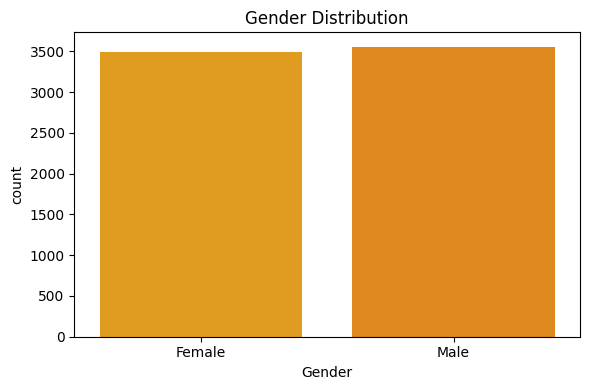

In [32]:
# Visualization 1: Gender Distribution
def plot_gender_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="Gender", palette=custom_orange_palette)
    plt.title("Gender Distribution")
    plt.tight_layout()
    plt.show()

plot_gender_distribution(df)

**Result**: The bar graph shows a nearly equal distribution of gender, with approximately 3500 females and slightly over 3500 males.

##### **Visualization 2: Senior Citizen Distribution**

C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\2449348262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="SeniorCitizen", palette=custom_orange_palette)
C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\2449348262.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=df, x="SeniorCitizen", palette=custom_orange_palette)


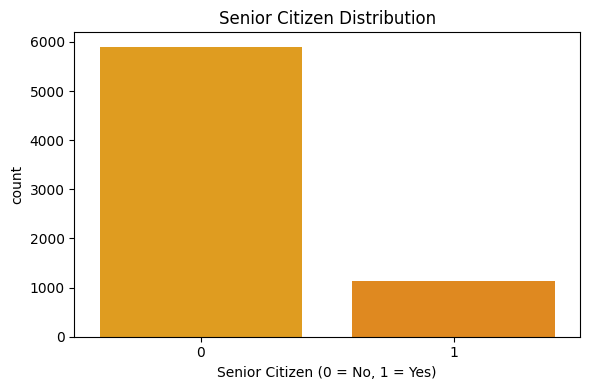

In [65]:
def plot_senior_citizen_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="SeniorCitizen", palette=custom_orange_palette)
    plt.title("Senior Citizen Distribution")
    plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
    plt.tight_layout()
    plt.show()

plot_senior_citizen_distribution(df)

**Result**: The bar graph illustrates the distribution of senior citizens. The count for non-senior citizens (represented by 0) is significantly higher, around 5900, compared to the count for senior citizens (represented by 1), which is approximately 1150.

##### **Visualization 3: Tenure Distribution**

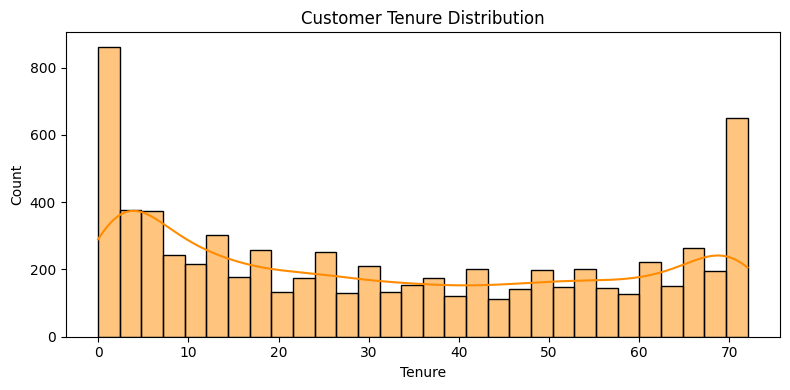

In [66]:
def plot_tenure_distribution(df):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x="Tenure", bins=30, kde=True, color="#FF8C00")  # Deep orange
    plt.title("Customer Tenure Distribution")
    plt.tight_layout()
    plt.show()

plot_tenure_distribution(df)

**Result**: This histogram displays the distribution of customer tenure. There are high counts of customers with very short tenure (around 0-5) and very long tenure (around 70-72). The number of customers within the mid-range of tenure (roughly 10 to 65) is generally lower and relatively consistent, with some minor fluctuations.

##### **Visualization 4: Internet Service Usage**

C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\2303932900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="InternetService", palette=custom_orange_palette)
C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\2303932900.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=df, x="InternetService", palette=custom_orange_palette)


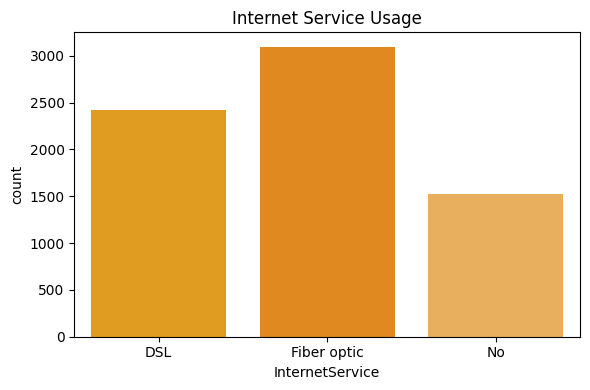

In [68]:
def plot_internet_service(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="InternetService", palette=custom_orange_palette)
    plt.title("Internet Service Usage")
    plt.tight_layout()
    plt.show()

plot_internet_service(df)

**Result**: The bar chart shows the usage of different internet services. "Fiber optic" has the highest number of users, with a count of over 3000. "DSL" has the second highest usage, with a count of approximately 2400. The number of customers with "No" internet service is the lowest, at around 1500.

##### **Visualization 5: Churn Rate**

C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\3873269051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette=custom_orange_palette)
C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\3873269051.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=df, x="Churn", palette=custom_orange_palette)


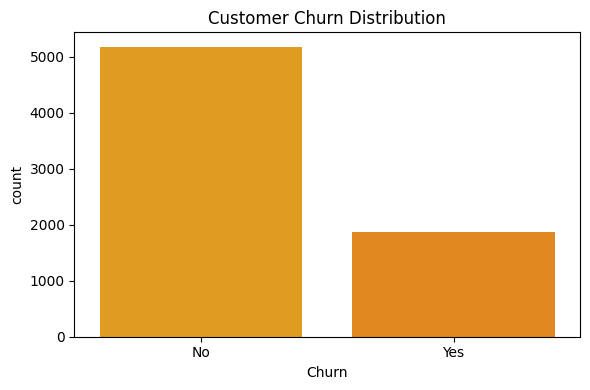

In [78]:
def plot_churn_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="Churn", palette=custom_orange_palette)
    plt.title("Customer Churn Distribution")
    plt.tight_layout()
    plt.show()

plot_churn_distribution(df)


**Result**: The bar graph illustrates the distribution of customer churn. The number of customers who did not churn ("No") is significantly higher, with a count of over 5100, compared to the number of customers who did churn ("Yes"), which is approximately 1850.

##### **Visualization 6: Monthly Charges vs Total Charges**

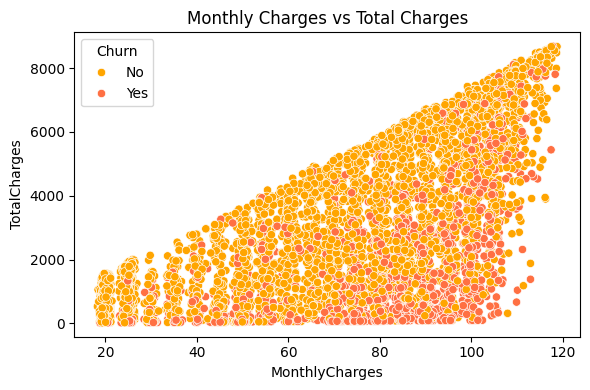

In [71]:
def plot_charges_scatter(df):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn", palette=["#FFA500", "#FF7043"])
    plt.title("Monthly Charges vs Total Charges")
    plt.tight_layout()
    plt.show()

plot_charges_scatter(df)

**Result**: This scatter plot shows the relationship between monthly charges and total charges, differentiated by customer churn.

- The majority of customers, both those who churned (represented in a lighter orange) and those who didn't (represented in a darker orange), show a positive correlation between monthly charges and total charges. As monthly charges increase, total charges generally also increase.
- Customers with lower monthly charges tend to have lower total charges.
- Customers with higher monthly charges exhibit a wider range of total charges, which is expected as tenure (and thus total charges) can vary even if monthly spending is similar.
- There isn't a clear separation between churned and non-churned customers based solely on monthly and total charges in this visualization. Both groups appear intermingled across the spectrum of charges.

##### **Visualization 7: Correlation Heatmap**

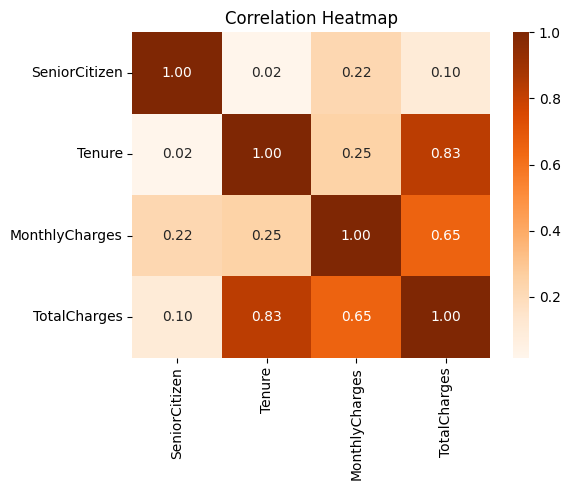

In [85]:
def plot_correlation_heatmap(df):
    numeric_df = df[["SeniorCitizen", "Tenure", "MonthlyCharges", "TotalCharges"]].copy()
    numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')
    plt.figure(figsize=(6, 5))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="Oranges", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(df)


**Result**

* **Strong Positive Correlation:**
    * Tenure & TotalCharges: 0.83
    * MonthlyCharges & TotalCharges: 0.65
* **Moderate Positive Correlation:** Tenure & MonthlyCharges: 0.25
* **Weak Correlation:** SeniorCitizen with Tenure, MonthlyCharges, TotalCharges.

**Suggestion**

* Investigate the relationship between Tenure and Monthly Charges.
* Prioritize customer retention strategies due to its strong link with Total Charges.
* Explore non-linear relationships or other factors related to Senior Citizens.
* Focus on identifying and improving drivers of customer Tenure.

##### **Visualization 8: Monthly Charges Box Plot**

C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\2227165993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette=custom_orange_palette)
C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17572\2227165993.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette=custom_orange_palette)


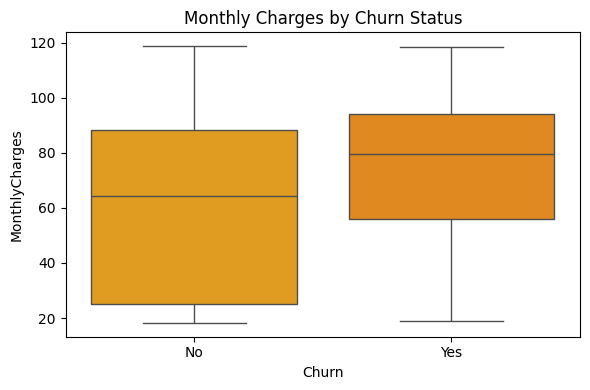

In [75]:
def plot_monthlycharges_boxplot(df):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette=custom_orange_palette)
    plt.title("Monthly Charges by Churn Status")
    plt.tight_layout()
    plt.show()

plot_monthlycharges_boxplot(df)

**Result**: Churned customers ("Yes") tend to have higher median monthly charges (around $80) with more variability compared to non-churned customers ("No"), who have a lower median (around $70) and less spread in their monthly charges.

##### **Service Usage by Churn**

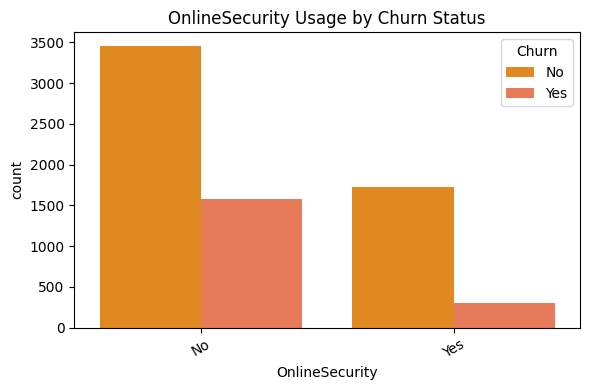

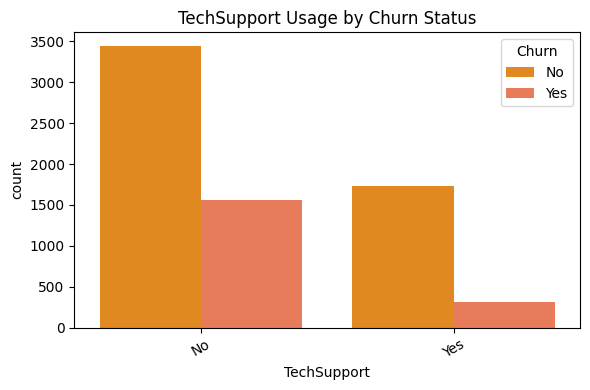

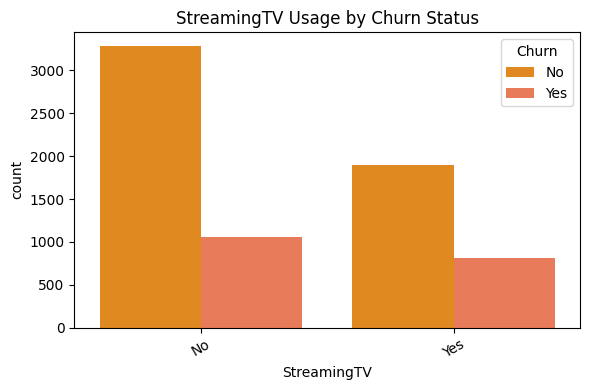

In [76]:
def plot_service_usage(df, column):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, hue="Churn", palette=["#FF8C00", "#FF7043"])
    plt.title(f"{column} Usage by Churn Status")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

plot_service_usage(df, "OnlineSecurity")
plot_service_usage(df, "TechSupport")
plot_service_usage(df, "StreamingTV")

##### **Generic Categorical Feature  by Churn**

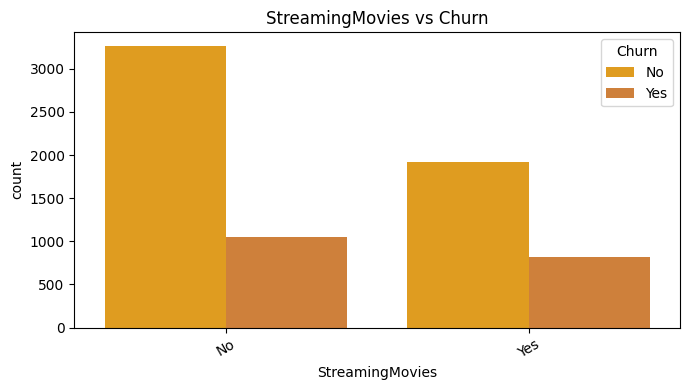

In [79]:
def plot_categorical_churn(df, column):
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=column, hue="Churn", palette=["#FFA500", "#E67E22"])
    plt.title(f"{column} vs Churn")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# Example usage
plot_categorical_churn(df, "StreamingMovies")

**Result**: Customers not streaming movies exhibit a higher retention rate compared to those who do.

**Recommendation**:
- **Investigate**: Understand why customers who stream movies are more likely to churn. Is it related to content, cost, or other factors?
- **Consider**: Targeted offers or loyalty programs for streaming movie subscribers to improve retention.

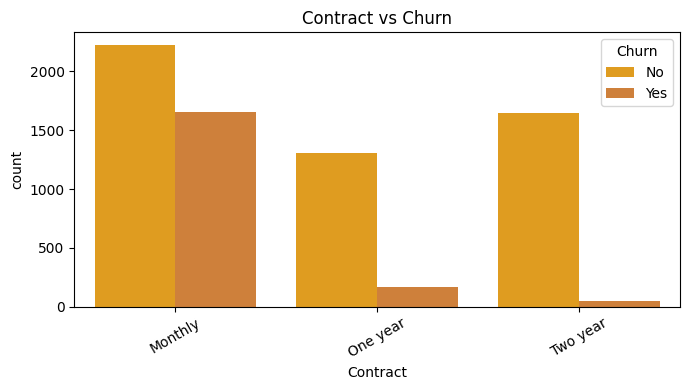

In [80]:
plot_categorical_churn(df, "Contract")

**Result**: Customers with month-to-month contracts have the highest churn rate, while those with two-year contracts have the lowest.

**Recommendation**:
* **Incentivize Longer Contracts:** Promote and incentivize one-year and two-year contracts through discounts or added benefits.
* **Re-evaluate Month-to-Month:** Analyze the reasons behind the high churn in monthly contracts and consider strategies to encourage longer commitments.


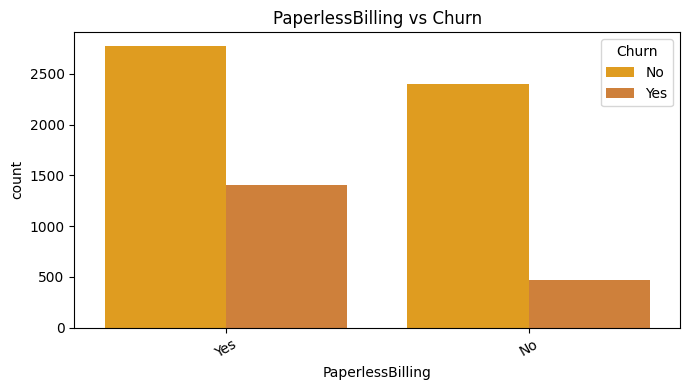

In [81]:
plot_categorical_churn(df, "PaperlessBilling")

**Result**: Customers with paperless billing exhibit a higher churn rate compared to those without.

**Recommendation**:
* **Investigate:** Explore the reasons for higher churn among paperless billing customers. Is it related to technical issues, lack of clarity, or a preference for traditional billing?
* **Improve Experience:** Ensure a smooth and user-friendly digital billing experience. Offer support and clear communication regarding paperless billing.


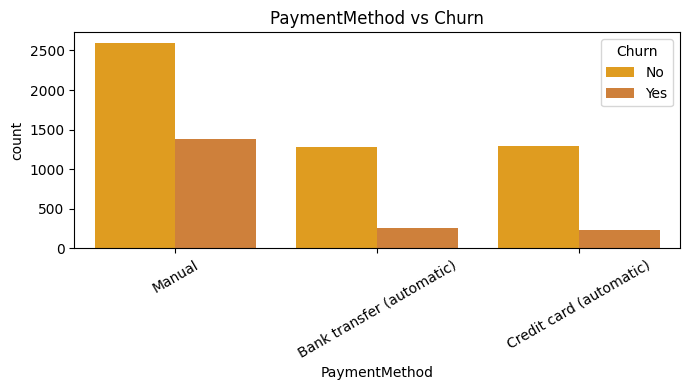

In [82]:
plot_categorical_churn(df, "PaymentMethod")

**Result**: Customers using manual payment methods show a higher churn rate compared to those using automatic methods (bank transfer or credit card).

**Recommendation**:
* **Encourage Automatic Payments:** Promote and incentivize automatic payment methods (bank transfer, credit card) due to their association with higher retention.
* **Address Manual Payment Issues:** Understand the pain points for customers using manual payments and explore solutions or offer support to transition them to automatic options.

